In [2]:
%matplotlib inline
from bigbang.archive import Archive
from bigbang.thread import Thread
from bigbang.thread import Node
import matplotlib.pyplot as plt
import datetime

First, collect data from a public email archive.

In [3]:
url = "https://lists.wikimedia.org/pipermail/analytics/"
arx = Archive(url,archive_dir="../archives")

We can count the number of threads in the archive easily. The first time you run `Archive.get_thread` it may take some time to compute, but the result is cached in the Archive object.

In [4]:
#threads = arx.get_threads()
len(arx.get_threads())

628

We can plot a histogram of the number of messages in each thread. In most cases this will be a power law distribution.

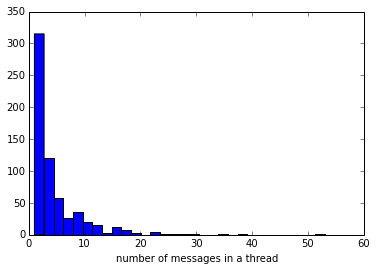

In [5]:
y = [t.get_num_messages() for t in arx.get_threads()]

plt.hist(y, bins=30)
plt.xlabel('number of messages in a thread')
plt.show()

We can also plot the number of people participating in each thread. Here, the participants are differentiated by the *From:* header on the emails they've sent. 

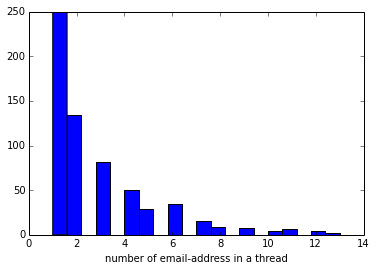

In [6]:
n = [t.get_num_people() for t in arx.get_threads()]

plt.hist(n, bins = 20)
plt.xlabel('number of email-address in a thread')
plt.show()

The *duration* of a thread is the amount of elapsed time between its first and last message. 

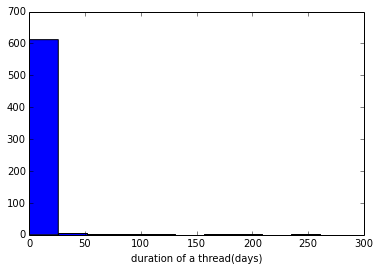

In [7]:
y = [t.get_duration().days for t in arx.get_threads()]

plt.hist(y, bins = (10))
plt.xlabel('duration of a thread(days)')
plt.show()

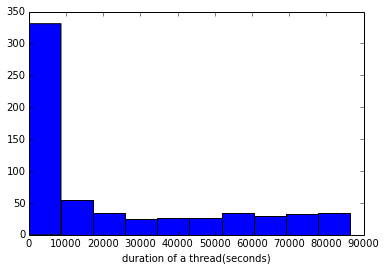

In [8]:
y = [t.get_duration().seconds for t in arx.get_threads()]

plt.hist(y, bins = (10))
plt.xlabel('duration of a thread(seconds)')
plt.show()

You can examine the properties of a single thread.

In [9]:
print((arx.get_threads()[0].get_duration()))

19:49:47


In [21]:
threads = arx.get_threads

In [22]:
content = arx.get_threads()[0].get_root().data['Body']
content

'Welcome to the the inaugural Analytics Mailing list email.\n\nHere all your analytics wishes comes true, \n\n\nso proposals, ideas, crazy ideas, crazy crazy ideas are welcome here!\nas long as we can count something it is welcome. \n\n\nD\n\n'

In [23]:
len(content.split())

38

Suppose we want to know whether or not longer threads (that contain more distinct messages) have more words.

In [24]:
short_threads = []
long_threads = []
for t in arx.get_threads():
    if(t.get_num_messages() < 6): short_threads.append(t)
    else: long_threads.append(t)

In [25]:
print((len(short_threads)))
print((len(long_threads)))

471
157


In [26]:
len(long_threads[0].get_content())

13

In [27]:
dist_short = []
dist_long = []
for t in short_threads:
    avg_short = sum([len(i.split()) for i in t.get_content()]) / len(t.get_content())
    dist_short.append(avg_short)
for t in long_threads:
    avg_long = sum([len(i.split()) for i in t.get_content()]) / len(t.get_content())
    dist_long.append(avg_long)

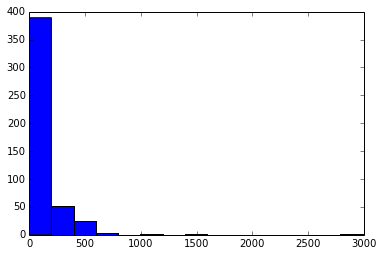

In [28]:
plt.hist(dist_short, bins = (15))
plt.show()

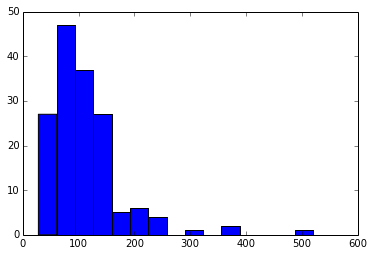

In [29]:
plt.hist(dist_long, bins = (15))
plt.show()

In [30]:
print((sum(dist_short)/ len(dist_short)))
print((sum(dist_long)/ len(dist_long)))

140
110


In [31]:
%reload_ext autoreload
s_leaves = []
s_notleaves = []
for t in threads:
    for node in t.get_leaves():
        s_leaves.append(len(node.data['Body'].split()))
    for node in t.get_not_leaves():
        s_notleaves.append(len(node.data['Body'].split()))

TypeError: 'instancemethod' object is not iterable

IndexError: list index out of range

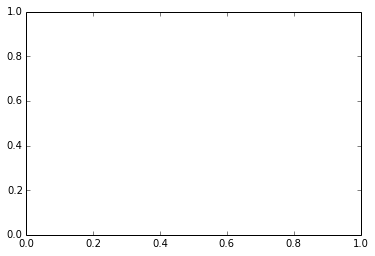

In [20]:
plt.hist(s_leaves, bins = (15))
plt.show()

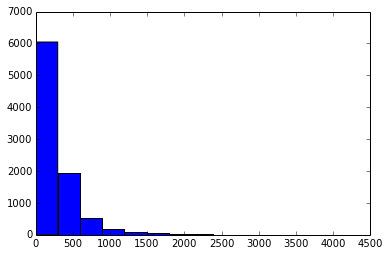

In [23]:
plt.hist(s_notleaves, bins = (15))
plt.show()

In [24]:
print((sum(s_leaves)/len(s_leaves)))
print((sum(s_notleaves)/len(s_notleaves)))

264
295


In [25]:
import re
mess = threads[85].get_leaves()[0].data['Body']

In [26]:
print(mess)

Fernando Perez wrote:

>
> Great!  Many thanks for this.  Please give it a bit more pounding, and 
> I'd encourage other users of dreload to also try it out.  The code is 
> definitely far simpler than the original dreload, but since I don't 
> understand that code too well, I'd like to tiptoe a bit on this 
> issue.  If it survives a bit of pounding and discussion, I'll 
> definitely be glad to put it in.

One of the things where it differ's from the old deep_reload is that 
when importing a submodule, say ipbug.vm, it will not reload 
ipbug/__init__.py. I've attached another version, which tries to do just 
that and I'm using that version currently without problems.
However I think there must be an even  less complicated version.  
Clearing sys.modules and 'reimporting' the module like in the following 
code seems to work ok.
====
import sys, bbutils.textproc.spellcheck
m=sys.modules.copy()
sys.modules.clear()
sys.modules['sys'] = sys
import bbutils.textproc.spellcheck
====

Currentl

In [27]:
mess.split('\n')
message = list()
for l in mess.split('\n'):
    n = len(l)
    if(len(l)!=0 and l[0] != '>' and l[n-6:n] != 'wrote:'):
        message.append(l)
new = str()
for l in message:
    new = new + l + '\n'


In [28]:
print(new)

One of the things where it differ's from the old deep_reload is that 
when importing a submodule, say ipbug.vm, it will not reload 
ipbug/__init__.py. I've attached another version, which tries to do just 
that and I'm using that version currently without problems.
However I think there must be an even  less complicated version.  
Clearing sys.modules and 'reimporting' the module like in the following 
code seems to work ok.
====
import sys, bbutils.textproc.spellcheck
m=sys.modules.copy()
sys.modules.clear()
sys.modules['sys'] = sys
import bbutils.textproc.spellcheck
====
Currently I don't have the time to investigate this further, but in a 
week or two, I'll  have another look at this.
- Ralf
-------------- next part --------------
import sys
import __builtin__
builtin_import = None   # will be set to __builtin__.__import__ by reload function
old_modules = {}        # will be set to sys.modules by reload function
reloaded = {}           # names of reloaded modules, uses same keys as 

In [29]:
print((EmailReplyParser.parse_reply(mess)))

NameError: name 'EmailReplyParser' is not defined

In [ ]:
print(mess)

In [ ]:
threads[85].get_leaves()[0].data